# Importing necessary things

In [1]:
import pandas as pd
import numpy as np
import sklearn

import sklearn.metrics as metrics
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import svm
from sklearn.svm import SVC

from tqdm import tqdm

import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, RegexpTokenizer, TweetTokenizer

import matplotlib.pyplot as plt
import seaborn as sns

import re
from datetime import datetime

import pickle

==================================================================================================================

# Preparing text for modeling

In [2]:
# Retreiving our tokens.

from pathlib import Path

root = Path('.')

#global
my_path1 = root / "tokens" / "processedreviewrating1.pbz2"
my_path2 = root / "tokens" / "processedreviewrating2.pbz2"
my_path3 = root / "tokens" / "processedreviewrating3.pbz2"
my_path4 = root / "tokens" / "processedreviewrating4.pbz2"
my_path5 = root / "tokens" / "processedreviewrating5.pbz2"

#sea
my_path6 = root / "tokens" / "processedreviewrating6.pbz2"
my_path7 = root / "tokens" / "processedreviewrating7.pbz2"
my_path8 = root / "tokens" / "processedreviewrating8.pbz2"
my_path9 = root / "tokens" / "processedreviewrating9.pbz2"
my_path10 = root / "tokens" / "processedreviewrating10.pbz2"

#globalapple
my_path11 = root / "tokens" / "processedreviewrating11.pbz2"
my_path12 = root / "tokens" / "processedreviewrating12.pbz2"
my_path13 = root / "tokens" / "processedreviewrating13.pbz2"
my_path14 = root / "tokens" / "processedreviewrating14.pbz2"
my_path15 = root / "tokens" / "processedreviewrating15.pbz2"

import bz2

def compressed_pickle(path, data):
    with bz2.BZ2File(path, 'w') as f:
        pickle.dump(data, f)

def decompress_pickle(file):
    data = bz2.BZ2File(file, 'rb')
    data = pickle.load(data)
    return data

In [3]:
# Retrieve our pickled dataframes

rating1global = decompress_pickle(my_path1)
rating2global = decompress_pickle(my_path2)
rating3global = decompress_pickle(my_path3)
rating4global = decompress_pickle(my_path4)
rating5global = decompress_pickle(my_path5)

rating1sea = decompress_pickle(my_path6)
rating2sea = decompress_pickle(my_path7)
rating3sea = decompress_pickle(my_path8)
rating4sea = decompress_pickle(my_path9)
rating5sea = decompress_pickle(my_path10)

rating1apple = decompress_pickle(my_path11)
rating2apple = decompress_pickle(my_path12)
rating3apple = decompress_pickle(my_path13)
rating4apple = decompress_pickle(my_path14)
rating5apple = decompress_pickle(my_path15)

In [4]:
# Putting everything together.

dfglobal = pd.concat([rating1global, rating2global, rating3global, rating4global, rating5global])
dfsea = pd.concat([rating1sea, rating2sea, rating3sea, rating4sea, rating5sea])
dfapple = pd.concat([rating1apple, rating2apple, rating3apple, rating4apple, rating5apple])

In [5]:
# Combining the Global reviews and ratings for both Google Play Store and Apple Store

dfglobal.drop(dfglobal.columns.difference(['content','score']), 1, inplace=True)
dfapple.drop(dfapple.columns.difference(['content','score']), 1, inplace=True)

print(dfglobal)
print('------------------------------------------------------------')
print(dfapple)

                                                content  score
0     Game full of bots on auto-attack who kill all ...      1
18    No, they have to actually finish the original ...      1
23                          Scam with gacha, stay away.      1
25                                      Cant download..      1
43    doesn't work well at all. on screen controls d...      1
...                                                 ...    ...
6526  The game just released, downloading it now. Lo...      5
6528     the best gaming experience for a mobile mmorpg      5
6529                                nice game, pls dont      5
6531  Gravity❤❤❤ R.O.Mobile version 😍😍😍! So, excitin...      5
6532  I love the old game can't wait to fall in love...      5

[6533 rows x 2 columns]
------------------------------------------------------------
      score                                            content
4         1  First I’d like to point out your own website p...
12        1  This game is done. 

In [6]:
dfglobalall = pd.concat([dfglobal, dfapple], ignore_index=True)
dfglobalall

,content,score
0,Game full of bots on auto-attack who kill all ...,1
1,"No, they have to actually finish the original ...",1
2,"Scam with gacha, stay away.",1
3,Cant download..,1
4,doesn't work well at all. on screen controls d...,1
...,...,...
7846,nice,5
7847,Fun game,5
7848,"Best game ever, so cool just amazing.",5
7849,I love it,5


==================================================================================================================

In [7]:
# Remove common words
stopwords_list = stopwords.words('english') + list(string.punctuation)
# Remove more punctuation
stopwords_list += ["''", '""', '...', '``']

In [8]:
def process_reviews(reviews):
    tokens = nltk.word_tokenize(reviews)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stopwords_list]
    return stopwords_removed  

lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in text]

In [9]:
dfglobalall['wordlist'] = dfglobalall['content'].apply(lambda x: process_reviews(x))
dfglobalall['wordlistlem'] = dfglobalall['wordlist'].apply(lemmatize_text)
dfglobalall['strings'] = [' '.join(i) for i in dfglobalall['wordlistlem']]

dfsea['wordlist'] = dfsea['content'].apply(lambda x: process_reviews(x))
dfsea['wordlistlem'] = dfsea['wordlist'].apply(lemmatize_text)
dfsea['strings'] = [' '.join(i) for i in dfsea['wordlistlem']]

In [10]:
dfglobalall['strings']

0       game full bot auto-attack kill mob 1 hit ca n'...
1       actually finish original material game stupid ...
2                                    scam gacha stay away
3                                         cant download..
4       n't work well screen control n't work let 's m...
                              ...                        
7846                                                 nice
7847                                             fun game
7848                          best game ever cool amazing
7849                                                 love
7850               brings back childhood memory better ✌️
Name: strings, Length: 7851, dtype: object

In [11]:
dfsea['strings']

0        trying install game extracting game file alway...
1        lagnarok eternal bug .. please fix game.. 'll ...
2        trash always trash lot bug cheater developer d...
5        game broken aside usual issue game always igno...
7                                                devs suck
                               ...                        
72226                                                     
72227                                               1 game
72228                                                   hy
72229                                           awesoommee
72230                                best mobile game ever
Name: strings, Length: 72231, dtype: object

==================================================================================================================

# TF-IDF

In [13]:
xglobal = dfglobalall['strings']
yglobal = dfglobalall['score']

X_trainglobal, X_testglobal, y_trainglobal, y_testglobal = train_test_split(xglobal, yglobal, random_state = 44)

In [14]:
xsea = dfsea['strings']
ysea = dfsea['score']

X_trainsea, X_testsea, y_trainsea, y_testsea = train_test_split(xsea, ysea, random_state = 44)

In [15]:
vec = TfidfVectorizer()

tfidf_X_trainglobal = vec.fit_transform(X_trainglobal)
tfidf_X_testglobal = vec.transform(X_testglobal)

tfidf_X_trainsea = vec.fit_transform(X_trainsea)
tfidf_X_testsea = vec.transform(X_testsea)

## Dummy Classifier Baseline Model

### Global

In [16]:
from sklearn.dummy import DummyClassifier

dclfgl = DummyClassifier()
dclfgl.fit(tfidf_X_trainglobal, y_trainglobal)
y_preds_dummyglobal = dclfgl.predict(tfidf_X_testglobal)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [17]:
#Evaluation Metrics for Dummy Classifier for ROM Global

print("Test Accuracy Score:", metrics.accuracy_score(y_testglobal, y_preds_dummyglobal))
print("Test Precision Score:", metrics.precision_score(y_testglobal, y_preds_dummyglobal, average = "weighted"))
print("Test Recall Score:", metrics.recall_score(y_testglobal, y_preds_dummyglobal, average = "weighted"))
print("Test F1 Score:", metrics.f1_score(y_testglobal, y_preds_dummyglobal, average = "weighted"))

Test Accuracy Score: 0.29495669893020887
Test Precision Score: 0.29561302344324925
Test Recall Score: 0.29495669893020887
Test F1 Score: 0.2952356144078652


### SEA

In [18]:
dclfsea = DummyClassifier()
dclfsea.fit(tfidf_X_trainsea, y_trainsea)
y_preds_dummysea = dclfsea.predict(tfidf_X_testsea)

In [19]:
#Evaluation Metrics for Dummy Classifier for ROM SEA

print("Test Accuracy Score:", metrics.accuracy_score(y_testsea, y_preds_dummysea))
print("Test Precision Score:", metrics.precision_score(y_testsea, y_preds_dummysea, average = "weighted"))
print("Test Recall Score:", metrics.recall_score(y_testsea, y_preds_dummysea, average = "weighted"))
print("Test F1 Score:", metrics.f1_score(y_testsea, y_preds_dummysea, average = "weighted"))

Test Accuracy Score: 0.37025141211651347
Test Precision Score: 0.3706041623084469
Test Recall Score: 0.37025141211651347
Test F1 Score: 0.3704153454207166


==================================================================================================================

## Naive Bayes

### Global

In [20]:
NBgl = MultinomialNB(fit_prior = False)

NBgl.fit(tfidf_X_trainglobal,y_trainglobal)

y_pred_nb_testglobal = NBgl.predict(tfidf_X_testglobal)

print("Test Accuracy Score:", metrics.accuracy_score(y_testglobal, y_pred_nb_testglobal))
print("Test Precision Score:", metrics.precision_score(y_testglobal, y_pred_nb_testglobal, average = "weighted"))
print("Test Recall Score:", metrics.recall_score(y_testglobal, y_pred_nb_testglobal, average = "weighted"))
print("Test F1 Score:", metrics.f1_score(y_testglobal, y_pred_nb_testglobal, average = "weighted"))

Test Accuracy Score: 0.6673458991339786
Test Precision Score: 0.5740931291949017
Test Recall Score: 0.6673458991339786
Test F1 Score: 0.588685159438921


Text(91.68, 0.5, 'Predicted Rating')

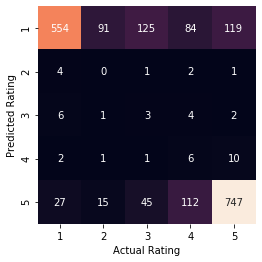

In [21]:
matrix = confusion_matrix(y_testglobal, y_pred_nb_testglobal)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=['1','2','3','4','5'], yticklabels=['1','2','3','4','5'])

plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')

### SEA

In [22]:
NBsea = MultinomialNB(fit_prior = False)

NBsea.fit(tfidf_X_trainsea,y_trainsea)

y_pred_nb_testsea = NBsea.predict(tfidf_X_testsea)

print("Test Accuracy Score:", metrics.accuracy_score(y_testsea, y_pred_nb_testsea))
print("Test Precision Score:", metrics.precision_score(y_testsea, y_pred_nb_testsea, average = "weighted"))
print("Test Recall Score:", metrics.recall_score(y_testsea, y_pred_nb_testsea, average = "weighted"))
print("Test F1 Score:", metrics.f1_score(y_testsea, y_pred_nb_testsea, average = "weighted"))

Test Accuracy Score: 0.7203455532174106
Test Precision Score: 0.677589324408215
Test Recall Score: 0.7203455532174106
Test F1 Score: 0.6868859004813613


Text(91.68, 0.5, 'Predicted Rating')

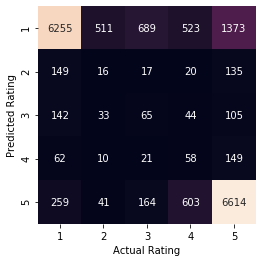

In [23]:
matrix = confusion_matrix(y_testsea, y_pred_nb_testsea)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=['1','2','3','4','5'], yticklabels=['1','2','3','4','5'])

plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')

==================================================================================================================

## Decision Tree

### Global

In [24]:
dtcgl = DecisionTreeClassifier()

dtcgl.fit(tfidf_X_trainglobal, y_trainglobal)

y_pred_dtc_testglobal = dtcgl.predict(tfidf_X_testglobal)

print("Test Accuracy Score:", metrics.accuracy_score(y_testglobal, y_pred_dtc_testglobal))
print("Test Precision Score:", metrics.precision_score(y_testglobal, y_pred_dtc_testglobal, average = "weighted"))
print("Test Recall Score:", metrics.recall_score(y_testglobal, y_pred_dtc_testglobal, average = "weighted"))
print("Test F1 Score:", metrics.f1_score(y_testglobal, y_pred_dtc_testglobal, average = "weighted"))

Test Accuracy Score: 0.5634233316352522
Test Precision Score: 0.5322297598550632
Test Recall Score: 0.5634233316352522
Test F1 Score: 0.5458594692827115


Text(91.68, 0.5, 'Predicted Rating')

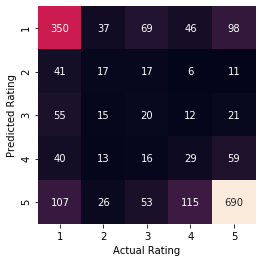

In [25]:
matrix = confusion_matrix(y_testglobal, y_pred_dtc_testglobal)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=['1','2','3','4','5'], yticklabels=['1','2','3','4','5'])

plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')

### SEA

In [26]:
dtcsea = DecisionTreeClassifier()

dtcsea.fit(tfidf_X_trainsea, y_trainsea)

y_pred_dtc_testsea = dtcsea.predict(tfidf_X_testsea)

print("Test Accuracy Score:", metrics.accuracy_score(y_testsea, y_pred_dtc_testsea))
print("Test Precision Score:", metrics.precision_score(y_testsea, y_pred_dtc_testsea, average = "weighted"))
print("Test Recall Score:", metrics.recall_score(y_testsea, y_pred_dtc_testsea, average = "weighted"))
print("Test F1 Score:", metrics.f1_score(y_testsea, y_pred_dtc_testsea, average = "weighted"))

Test Accuracy Score: 0.6972532949385314
Test Precision Score: 0.6585108180786039
Test Recall Score: 0.6972532949385314
Test F1 Score: 0.6759994193310968


Text(91.68, 0.5, 'Predicted Rating')

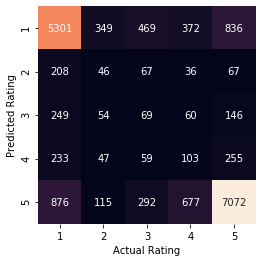

In [27]:
matrix = confusion_matrix(y_testsea, y_pred_dtc_testsea)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=['1','2','3','4','5'], yticklabels=['1','2','3','4','5'])

plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')

==================================================================================================================

## Random Forest

### Global

In [28]:
rfcgl = RandomForestClassifier()

rfcgl.fit(tfidf_X_trainglobal, y_trainglobal)

y_pred_rfc_testglobal = rfcgl.predict(tfidf_X_testglobal)

print("Test Accuracy Score:", metrics.accuracy_score(y_testglobal, y_pred_rfc_testglobal))
print("Test Precision Score:", metrics.precision_score(y_testglobal, y_pred_rfc_testglobal, average = "weighted"))
print("Test Recall Score:", metrics.recall_score(y_testglobal, y_pred_rfc_testglobal, average = "weighted"))
print("Test F1 Score:", metrics.f1_score(y_testglobal, y_pred_rfc_testglobal, average = "weighted"))

Test Accuracy Score: 0.6597045338767193
Test Precision Score: 0.5260389149089545
Test Recall Score: 0.6597045338767193
Test F1 Score: 0.5733577055814678


Text(91.68, 0.5, 'Predicted Rating')

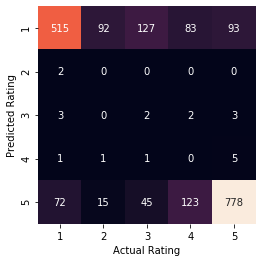

In [29]:
matrix = confusion_matrix(y_testglobal, y_pred_rfc_testglobal)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=['1','2','3','4','5'], yticklabels=['1','2','3','4','5'])

plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')

### SEA

In [30]:
rfcsea = RandomForestClassifier()

rfcsea.fit(tfidf_X_trainsea, y_trainsea)

y_pred_rfc_testsea = rfcsea.predict(tfidf_X_testsea)

print("Test Accuracy Score:", metrics.accuracy_score(y_testsea, y_pred_rfc_testsea))
print("Test Precision Score:", metrics.precision_score(y_testsea, y_pred_rfc_testsea, average = "weighted"))
print("Test Recall Score:", metrics.recall_score(y_testsea, y_pred_rfc_testsea, average = "weighted"))
print("Test F1 Score:", metrics.f1_score(y_testsea, y_pred_rfc_testsea, average = "weighted"))

Test Accuracy Score: 0.749640048731864
Test Precision Score: 0.6636095594508509
Test Recall Score: 0.749640048731864
Test F1 Score: 0.692184302259743


Text(91.68, 0.5, 'Predicted Rating')

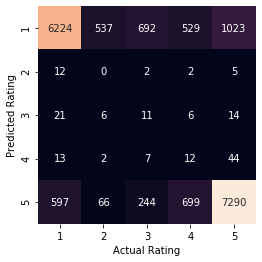

In [31]:
matrix = confusion_matrix(y_testsea, y_pred_rfc_testsea)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=['1','2','3','4','5'], yticklabels=['1','2','3','4','5'])

plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')

==================================================================================================================

## Support Vector Machine

### Global

In [32]:
SVMgl = svm.SVC()
SVMgl.fit(tfidf_X_trainglobal, y_trainglobal)

y_pred_SVM_testglobal = SVMgl.predict(tfidf_X_testglobal)

print("Test Accuracy Score:", metrics.accuracy_score(y_testglobal, y_pred_SVM_testglobal))
print("Test Precision Score:", metrics.precision_score(y_testglobal, y_pred_SVM_testglobal, average = "weighted"))
print("Test Recall Score:", metrics.recall_score(y_testglobal, y_pred_SVM_testglobal, average = "weighted"))
print("Test F1 Score:", metrics.f1_score(y_testglobal, y_pred_SVM_testglobal, average = "weighted"))

Test Accuracy Score: 0.6861946001018848
Test Precision Score: 0.5976588974378213
Test Recall Score: 0.6861946001018848
Test F1 Score: 0.5965860085863044


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(91.68, 0.5, 'Predicted Rating')

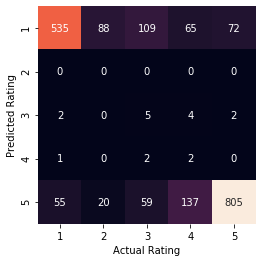

In [33]:
matrix = confusion_matrix(y_testglobal, y_pred_SVM_testglobal)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=['1','2','3','4','5'], yticklabels=['1','2','3','4','5'])

plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')

### SEA

In [34]:
starttime = datetime.now()

#######

SVMsea = svm.SVC()
SVMsea.fit(tfidf_X_trainsea, y_trainsea)

y_pred_SVM_testsea = SVMsea.predict(tfidf_X_testsea)

print("Test Accuracy Score:", metrics.accuracy_score(y_testsea, y_pred_SVM_testsea))
print("Test Precision Score:", metrics.precision_score(y_testsea, y_pred_SVM_testsea, average = "weighted"))
print("Test Recall Score:", metrics.recall_score(y_testsea, y_pred_SVM_testsea, average = "weighted"))
print("Test F1 Score:", metrics.f1_score(y_testsea, y_pred_SVM_testsea, average = "weighted"))

#######

print('------------------------')
print(datetime.now() - starttime)

Test Accuracy Score: 0.7664193155388194
Test Precision Score: 0.6768463421761219
Test Recall Score: 0.7664193155388194
Test F1 Score: 0.7035571569517362
------------------------
0:11:37.737786


Text(91.68, 0.5, 'Predicted Rating')

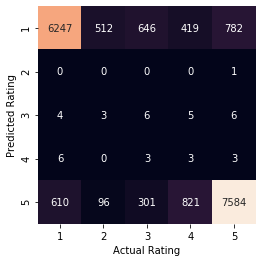

In [35]:
matrix = confusion_matrix(y_testsea, y_pred_SVM_testsea)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=['1','2','3','4','5'], yticklabels=['1','2','3','4','5'])

plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')

==================================================================================================================

## Gridsearch (Decision Tree)

In [36]:
dtc_param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [None, 2, 3, 4, 5, 6],
    'max_features': ['auto', 'log2', None],
    'min_samples_split' : [2, 3, 4, 5, 10, 15],
    'min_samples_leaf' : [1, 2, 3, 4, 5, 10]
}


### Global

In [37]:
starttime = datetime.now()

#######

dt_gridgl = GridSearchCV(dtcgl, dtc_param_grid, cv=5, return_train_score=True)

dt_gridgl.fit(tfidf_X_trainglobal, y_trainglobal)

#######

print(datetime.now() - starttime)

0:03:57.727065


In [38]:
dt_grid_trainscoregl = np.mean(dt_gridgl.cv_results_['mean_train_score'])

dt_grid_testscoregl = dt_gridgl.score(tfidf_X_trainglobal, y_trainglobal)

print(f"Mean Training Score: {dt_grid_trainscoregl : .2%}")
print(f"Mean Test Score: {dt_grid_testscoregl : .2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_gridgl.best_params_

Mean Training Score:  52.73%
Mean Test Score:  66.34%
Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 5}

In [39]:
dtcgl = DecisionTreeClassifier(criterion='gini', max_depth=None, max_features='auto', min_samples_leaf=3, min_samples_split=5, random_state=22)

dtcgl.fit(tfidf_X_trainglobal, y_trainglobal)

y_pred_dtc_testglobal = dtcgl.predict(tfidf_X_testglobal)

print("Test Accuracy Score:", metrics.accuracy_score(y_testglobal, y_pred_dtc_testglobal))
print("Test Precision Score:", metrics.precision_score(y_testglobal, y_pred_dtc_testglobal, average = "weighted"))
print("Test Recall Score:", metrics.recall_score(y_testglobal, y_pred_dtc_testglobal, average = "weighted"))
print("Test F1 Score:", metrics.f1_score(y_testglobal, y_pred_dtc_testglobal, average = "weighted"))

Test Accuracy Score: 0.5858380030565461
Test Precision Score: 0.503245271479975
Test Recall Score: 0.5858380030565461
Test F1 Score: 0.5296044005973025


Compare to:
- Test Accuracy Score: 0.5828182941903585 (INCREASE)
- Test Precision Score: 0.5517076557322531 (INCREASE)
- Test Recall Score: 0.5828182941903585 (INCREASE)
- Test F1 Score: 0.5650720155946124 (INCREASE)

Text(91.68, 0.5, 'Predicted Rating')

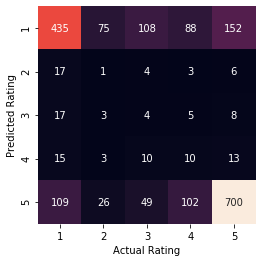

In [40]:
matrix = confusion_matrix(y_testglobal, y_pred_dtc_testglobal)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=['1','2','3','4','5'], yticklabels=['1','2','3','4','5'])

plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')

### SEA

In [41]:
starttime = datetime.now()

#######

dt_gridsea = GridSearchCV(dtcsea, dtc_param_grid, cv=5, return_train_score=True)

dt_gridsea.fit(tfidf_X_trainsea, y_trainsea)

#######

print(datetime.now() - starttime)

0:59:55.033356


In [42]:
dt_grid_trainscoresea = np.mean(dt_gridsea.cv_results_['mean_train_score'])

dt_grid_testscoresea = dt_gridsea.score(tfidf_X_trainsea, y_trainsea)

print(f"Mean Training Score: {dt_grid_trainscoresea : .2%}")
print(f"Mean Test Score: {dt_grid_testscoresea : .2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_gridsea.best_params_

Mean Training Score:  54.53%
Mean Test Score:  74.49%
Best Parameter Combination Found During Grid Search:


{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 15}

In [43]:
dtcsea = DecisionTreeClassifier(criterion='gini', max_depth=None, max_features='auto', min_samples_leaf=2, min_samples_split=2, random_state=22)

dtcsea.fit(tfidf_X_trainsea, y_trainsea)

y_pred_dtc_testsea = dtcsea.predict(tfidf_X_testsea)

print("Test Accuracy Score:", metrics.accuracy_score(y_testsea, y_pred_dtc_testsea))
print("Test Precision Score:", metrics.precision_score(y_testsea, y_pred_dtc_testsea, average = "weighted"))
print("Test Recall Score:", metrics.recall_score(y_testsea, y_pred_dtc_testsea, average = "weighted"))
print("Test F1 Score:", metrics.f1_score(y_testsea, y_pred_dtc_testsea, average = "weighted"))

Test Accuracy Score: 0.7163584007088271
Test Precision Score: 0.6408979197806333
Test Recall Score: 0.7163584007088271
Test F1 Score: 0.6676494912355879


- Test Accuracy Score: 0.6986863255917077 (INCREASE)
- Test Precision Score: 0.6647125048305412 (DECREASE)
- Test Recall Score: 0.6986863255917077 (INCREASE)
- Test F1 Score: 0.6803483128842415 (DECREASE)

Text(91.68, 0.5, 'Predicted Rating')

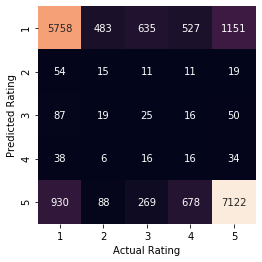

In [44]:
matrix = confusion_matrix(y_testsea, y_pred_dtc_testsea)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=['1','2','3','4','5'], yticklabels=['1','2','3','4','5'])

plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')

==================================================================================================================

## Gridsearch (Random Forest)

In [45]:
rf_param_grid = {
    'n_estimators' : [50, 100],
    'criterion' : ['gini'],
    'max_depth' : [None, 2, 4],
    'max_features': ['auto', 'log2', None],
    'min_samples_split' : [5, 10],
    'min_samples_leaf' : [1, 3]
}

### Global

In [46]:
starttime = datetime.now()

#######

rf_gridgl = GridSearchCV(rfcgl, rf_param_grid, cv=5)

rf_gridgl.fit(tfidf_X_trainglobal, y_trainglobal)

#######

print(datetime.now() - starttime)

0:17:13.084152


In [47]:
print(f"Training Accuracy: {rf_gridgl.best_score_ : .2%}")
print("Best Parameter Combination Found During Grid Search:")
rf_gridgl.best_params_

Training Accuracy:  66.17%
Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [48]:
rfcgl = RandomForestClassifier(n_estimators = 100, criterion='gini', max_depth=None, max_features='log2', min_samples_leaf=1, min_samples_split=10, random_state = 11, n_jobs=-1)

rfcgl.fit(tfidf_X_trainglobal, y_trainglobal)

y_pred_rfc_testglobal = rfcgl.predict(tfidf_X_testglobal)

print("Test Accuracy Score:", metrics.accuracy_score(y_testglobal, y_pred_rfc_testglobal))
print("Test Precision Score:", metrics.precision_score(y_testglobal, y_pred_rfc_testglobal, average = "weighted"))
print("Test Recall Score:", metrics.recall_score(y_testglobal, y_pred_rfc_testglobal, average = "weighted"))
print("Test F1 Score:", metrics.f1_score(y_testglobal, y_pred_rfc_testglobal, average = "weighted"))

Test Accuracy Score: 0.6704024452368823
Test Precision Score: 0.5337384150710118
Test Recall Score: 0.6704024452368823
Test F1 Score: 0.5793401087215709


Compare to:

- Test Accuracy Score: 0.6674907292954264 (INCREASE)
- Test Precision Score: 0.5651900373859852 (DECREASE)
- Test Recall Score: 0.6674907292954264 (INCREASE)
- Test F1 Score: 0.579991930811728 (INCREASE)

Text(91.68, 0.5, 'Predicted Rating')

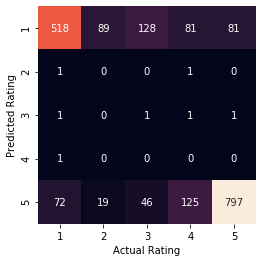

In [49]:
matrix = confusion_matrix(y_testglobal, y_pred_rfc_testglobal)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=['1','2','3','4','5'], yticklabels=['1','2','3','4','5'])

plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')

### SEA

In [50]:
starttime = datetime.now()

#######

#rf_gridsea = GridSearchCV(rfcsea, rf_param_grid, cv=5)

#rf_gridsea.fit(tfidf_X_trainsea, y_trainsea)

#######

print(datetime.now() - starttime)

# Takes too long to run

0:00:00.000036


In [51]:
#print(f"Training Accuracy: {rf_gridsea.best_score_ : .2%}")
#print("Best Parameter Combination Found During Grid Search:")
#rf_gridsea.best_params_

In [52]:
rfcsea = RandomForestClassifier(n_estimators = 100, criterion='gini', max_depth=None, max_features='log2', min_samples_leaf=1, min_samples_split=10, random_state = 11, n_jobs=-1)

rfcsea.fit(tfidf_X_trainsea, y_trainsea)

y_pred_rfc_testsea = rfcsea.predict(tfidf_X_testsea)

print("Test Accuracy Score:", metrics.accuracy_score(y_testsea, y_pred_rfc_testsea))
print("Test Precision Score:", metrics.precision_score(y_testsea, y_pred_rfc_testsea, average = "weighted"))
print("Test Recall Score:", metrics.recall_score(y_testsea, y_pred_rfc_testsea, average = "weighted"))
print("Test F1 Score:", metrics.f1_score(y_testsea, y_pred_rfc_testsea, average = "weighted"))

Test Accuracy Score: 0.755177760549341
Test Precision Score: 0.6819003888470866
Test Recall Score: 0.755177760549341
Test F1 Score: 0.6956134392887675


Compared to:

- Test Accuracy Score: 0.7553904994179923 (INCREASE)
- Test Precision Score: 0.6689902317348971 (INCREASE)
- Test Recall Score: 0.7553904994179923 (INCREASE)
- Test F1 Score: 0.6981747064250369 (INCREASE)

Text(91.68, 0.5, 'Predicted Rating')

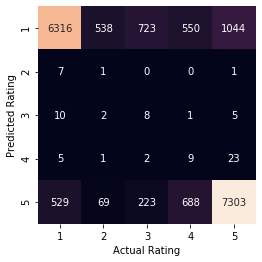

In [53]:
matrix = confusion_matrix(y_testsea, y_pred_rfc_testsea)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=['1','2','3','4','5'], yticklabels=['1','2','3','4','5'])

plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')

==================================================================================================================

## Gridsearch (Support Vector Machine)

In [54]:
svm_param_grid = {
    'C' : [0.1, 1, 10],
    'gamma' : [1, 0.1, 0.01],
    'kernel' : ['linear', 'nonlinear', 'sigmoid', 'polynomial']
}

### Global

In [55]:
starttime = datetime.now()

#######

svm_gridgl = GridSearchCV(SVMgl, svm_param_grid, refit=True, verbose=3)

svm_gridgl.fit(tfidf_X_trainglobal, y_trainglobal)

#######

print(datetime.now() - starttime)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.658, total=   3.3s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.666, total=   3.4s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.7s remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.655, total=   3.4s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.645, total=   3.4s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.649, total=   3.3s
[CV] C=0.1, gamma=1, kernel=nonlinear ................................
[CV] ...... C=0.1, gamma=1, kernel=nonlinear, score=nan, total=   0.0s
[CV] C=0.1, gamma=1, kernel=nonlinear ................................
[CV] ...... C=0.1, gamma=1, kernel=nonlinear, score=nan, total=   0.0s
[CV] C=0.1, gamma=1, kernel=nonlinear ................................
[CV] ...... C=0.1, gamma=1, kernel=nonlinear, score=nan, total=   0.0s
[CV] C=0.1, gamma=1, kernel=nonlinear ................................
[CV] ...... C=0.1, gamma=1, kernel=nonlinear, score=nan, total=   0.0s
[CV] C=0.1, gamma=1, kernel=nonlinear ................................
[CV] .

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py", line 285, in _sparse_fit
    kernel_type = self._sparse_kernels.index(kernel)
ValueError: 'nonlinear' is not in list

  FitFailedWarning)


[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.658, total=   3.4s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.663, total=   3.4s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.654, total=   3.4s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.642, total=   3.4s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.650, total=   3.4s
[CV] C=0.1, gamma=1, kernel=polynomial ...............................
[CV] ..... C=0.1, gamma=1, kernel=polynomial, score=nan, total=   0.0s
[CV] C=0.1, gamma=1, kernel=polynomial ...............................
[CV] ..... C=0.1, gamma=1, kernel=polynomial, score=nan, total=   0.0s
[CV] C=0.1, gamma=1, kernel=polynomial ...............................
[CV] .

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py", line 285, in _sparse_fit
    kernel_type = self._sparse_kernels.index(kernel)
ValueError: 'polynomial' is not in list

  FitFailedWarning)


[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.658, total=   3.3s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.666, total=   3.4s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.655, total=   3.4s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.645, total=   3.4s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.649, total=   3.3s
[CV] C=0.1, gamma=0.1, kernel=nonlinear ..............................
[CV] .... C=0.1, gamma=0.1, kernel=nonlinear, score=nan, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=nonlinear ..............................
[CV] .... C=0.1, gamma=0.1, kernel=nonlinear, score=nan, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=nonlinear ..............................
[CV] .

[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.663, total=   3.1s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.683, total=   3.1s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.677, total=   3.1s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.665, total=   3.1s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.662, total=   3.0s
[CV] C=1, gamma=0.1, kernel=nonlinear ................................
[CV] ...... C=1, gamma=0.1, kernel=nonlinear, score=nan, total=   0.0s
[CV] C=1, gamma=0.1, kernel=nonlinear ................................
[CV] ...... C=1, gamma=0.1, kernel=nonlinear, score=nan, total=   0.0s
[CV] C=1, gamma=0.1, kernel=nonlinear ................................
[CV] .

[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.608, total=   3.5s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.616, total=   3.4s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.629, total=   3.4s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.613, total=   3.5s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.605, total=   3.4s
[CV] C=10, gamma=0.1, kernel=nonlinear ...............................
[CV] ..... C=10, gamma=0.1, kernel=nonlinear, score=nan, total=   0.0s
[CV] C=10, gamma=0.1, kernel=nonlinear ...............................
[CV] ..... C=10, gamma=0.1, kernel=nonlinear, score=nan, total=   0.0s
[CV] C=10, gamma=0.1, kernel=nonlinear ...............................
[CV] .

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  5.0min finished


0:05:03.730796


In [56]:
print(svm_gridgl.best_params_)
print(svm_gridgl.best_estimator_)

{'C': 1, 'gamma': 1, 'kernel': 'linear'}
SVC(C=1, gamma=1, kernel='linear')


In [57]:
SVMgl = svm.SVC(C=10, gamma=0.1, kernel='sigmoid')
SVMgl.fit(tfidf_X_trainglobal, y_trainglobal)

y_pred_SVM_testglobal = SVMgl.predict(tfidf_X_testglobal)

print("Test Accuracy Score:", metrics.accuracy_score(y_testglobal, y_pred_SVM_testglobal))
print("Test Precision Score:", metrics.precision_score(y_testglobal, y_pred_SVM_testglobal, average = "weighted"))
print("Test Recall Score:", metrics.recall_score(y_testglobal, y_pred_SVM_testglobal, average = "weighted"))
print("Test F1 Score:", metrics.f1_score(y_testglobal, y_pred_SVM_testglobal, average = "weighted"))

Test Accuracy Score: 0.6856851757514009
Test Precision Score: 0.5969984084375664
Test Recall Score: 0.6856851757514009
Test F1 Score: 0.6160057129216149


Compared to:

- Test Accuracy Score: 0.6841779975278122 (INCREASE)
- Test Precision Score: 0.5872740271369469 (DECREASE)
- Test Recall Score: 0.6841779975278122 (INCREASE)
- Test F1 Score: 0.5949577097822947 (INCREASE)

Text(91.68, 0.5, 'Predicted Rating')

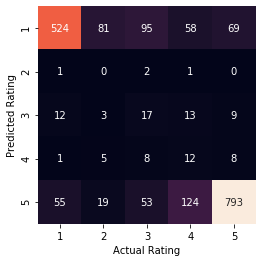

In [58]:
matrix = confusion_matrix(y_testglobal, y_pred_SVM_testglobal)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=['1','2','3','4','5'], yticklabels=['1','2','3','4','5'])

plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')

### SEA

In [59]:
starttime = datetime.now()

#######

#svm_gridsea = GridSearchCV(SVMsea, svm_param_grid, refit=True, verbose=3)

#svm_gridsea.fit(tfidf_X_trainsea, y_trainsea)

#######

print(datetime.now() - starttime)

# Takes too long to run.

0:00:00.000043


In [60]:
#print(svm_gridsea.best_params_)
#print(svm_gridsea.best_estimator_)

In [61]:
starttime = datetime.now()

#######

SVMsea = svm.SVC(C=1, gamma=1, kernel='linear')
SVMsea.fit(tfidf_X_trainsea, y_trainsea)

y_pred_SVM_testsea = SVMsea.predict(tfidf_X_testsea)

print("Test Accuracy Score:", metrics.accuracy_score(y_testsea, y_pred_SVM_testsea))
print("Test Precision Score:", metrics.precision_score(y_testsea, y_pred_SVM_testsea, average = "weighted"))
print("Test Recall Score:", metrics.recall_score(y_testsea, y_pred_SVM_testsea, average = "weighted"))
print("Test F1 Score:", metrics.f1_score(y_testsea, y_pred_SVM_testsea, average = "weighted"))

#######

print('---------------------')
print(datetime.now() - starttime)

Test Accuracy Score: 0.7623767859120612
Test Precision Score: 0.6698630640639892
Test Recall Score: 0.7623767859120612
Test F1 Score: 0.7018641845256975
---------------------
0:05:36.678101


Compared to:
- Test Accuracy Score: 0.7723518651959426 (DECREASE)
- Test Precision Score: 0.6895906690359215 (DECREASE)
- Test Recall Score: 0.7723518651959426 (DECREASE)
- Test F1 Score: 0.7100195104243602 (DECREASE)

Text(91.68, 0.5, 'Predicted Rating')

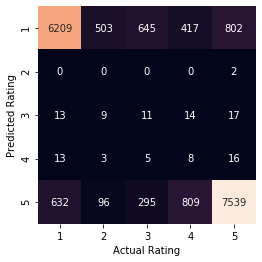

In [62]:
matrix = confusion_matrix(y_testsea, y_pred_SVM_testsea)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=['1','2','3','4','5'], yticklabels=['1','2','3','4','5'])

plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')

==================================================================================================================

# Summary of Models

We will be using Accuracy and F1 score to indicate performance of the models

## Global Models:

- Dummy Classifier: 33.19% Accuracy, 32.79% F1 Score
- Naive Bayes: 66.87% Accuracy, 58.90% F1 Score
- Decision Tree: 58.28% Accuracy, 56.51% F1 Score
- Random Forest: 66.75% Accuracy, 58.00% F1 Score
- Support Vector Machine: 68.42% Accuracy, 59.50% F1 Score

#### GridSearch Global

- DT: 59.15% Accuracy, 52.87% F1 Score
- RF: 67.49% Accuracy, 58.38% F1 Score
- SVT: 68.72% Accuracy, 61.93% F1 Score

## SEA Models:

- Dummy Classifier: 36.67% Accuracy, 36.84% F1 Score
- Naive Bayes: 72.62% Accuracy, 69.06% F1 Score
- Decision Tree 69.87% Accuracy, 68.03% F1 Score
- Random Forest: 75.54% Accuracy, 69.82% F1 Score
- Support Vector Machine: 77.24% Accuracy, 71.00% F1 Score

#### GridSearch SEA

- DT: 72.09% Accuracy, 67.33% F1 Score
- RF: N/A (75.44% Accuracy, 70.05% F1 Score)
- SVT: N/A (76.84% Accuracy, 70.83% F1 Score)

# Best Models

Global:

- Support Vector Machine (gridsearch): 68.73% Accuracy, 61.93% F1 Score

SEA:

- Support Vector Machine (no gridsearch): 77.24% Accuracy, 71.00% F1 Score